# Random Forest - 2

A cloth manufacturing company is interested to know about the segment or attributes that causes high sale. 
Approach - A Random Forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score

## Import Data

In [2]:
Data_Cloth_Company=pd.read_csv("C:\\Users\\shine\\Downloads\\Company_Data.csv")
Data_Cloth_Company.head(7)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No


## Data Understanding

The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [3]:
Data_Cloth_Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


<AxesSubplot:xlabel='Advertising', ylabel='Density'>

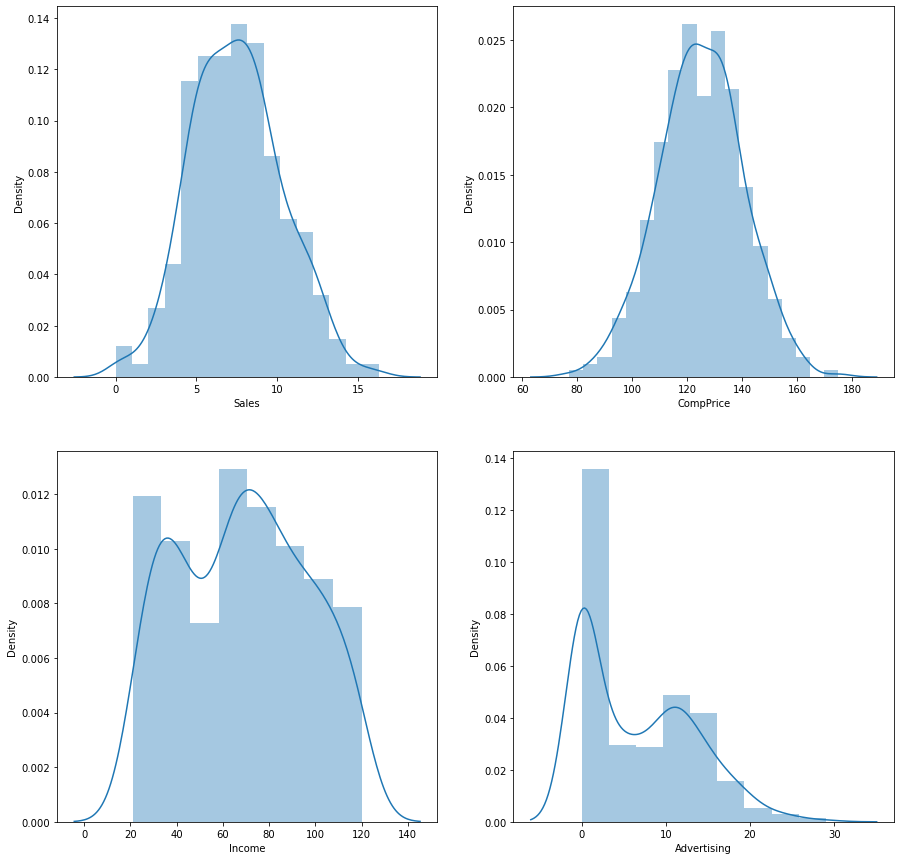

<Figure size 720x1080 with 0 Axes>

In [4]:
fig,axes=plt.subplots(2,2)
plt.figure(figsize=[10,15])

fig.set_figheight(15)
fig.set_figwidth(15)

sns.distplot(Data_Cloth_Company.Sales,ax=axes[0,0])

sns.distplot(Data_Cloth_Company.CompPrice,ax=axes[0,1])

sns.distplot(Data_Cloth_Company.Income,ax=axes[1,0])

sns.distplot(Data_Cloth_Company.Advertising,ax=axes[1,1])

<AxesSubplot:xlabel='Education', ylabel='Density'>

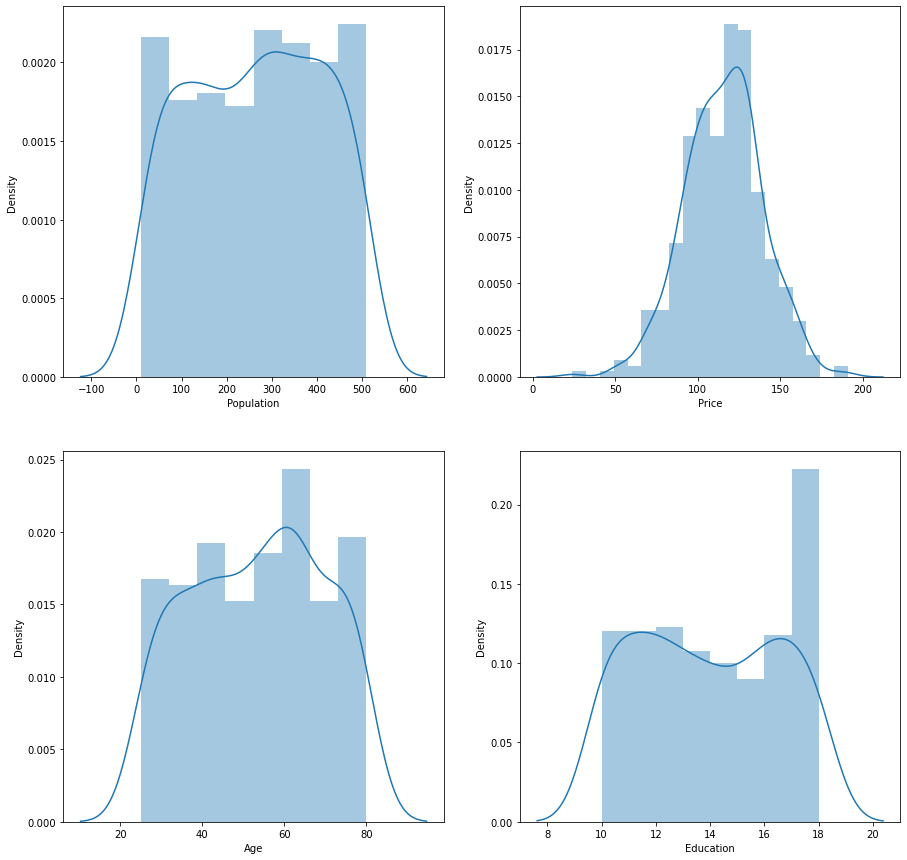

<Figure size 720x1080 with 0 Axes>

In [5]:
fig2,axes2=plt.subplots(2,2)
plt.figure(figsize=[10,15])

fig2.set_figheight(15)
fig2.set_figwidth(15)

sns.distplot(Data_Cloth_Company.Population,ax=axes2[0,0])

sns.distplot(Data_Cloth_Company.Price,ax=axes2[0,1])

sns.distplot(Data_Cloth_Company.Age,ax=axes2[1,0])

sns.distplot(Data_Cloth_Company.Education,ax=axes2[1,1])

## Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [7]:
Processed_Data=Data_Cloth_Company.copy()
Processed_Data["ShelveLoc"]=Le.fit_transform(Data_Cloth_Company["ShelveLoc"])
Processed_Data["Urban"]=Le.fit_transform(Data_Cloth_Company["Urban"])
Processed_Data["US"]=Le.fit_transform(Data_Cloth_Company["US"])
Processed_Data.head(7)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
5,10.81,124,113,13,501,72,0,78,16,0,1
6,6.63,115,105,0,45,108,2,71,15,1,0


In [8]:
Processed_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [9]:
Binned_y=pd.cut(Processed_Data.Sales,bins=4)
Processed_Data["Sales"]=Le.fit_transform(Binned_y)
Processed_Data["Sales"].head(7)

0    2
1    2
2    2
3    1
4    1
5    2
6    1
Name: Sales, dtype: int32

## Model Building

In [10]:
X=Processed_Data.drop("Sales",axis=1)
y=pd.DataFrame(Processed_Data["Sales"])

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=123)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(320, 10) (320, 1)
(80, 10) (80, 1)


## Model Training

In [12]:
from sklearn.ensemble import RandomForestClassifier

Rf_Model=RandomForestClassifier(criterion='gini',max_depth=3,random_state=123)
Rf_Model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [14]:
Rf_Model.score(X_test,y_test)

0.5375

## Model Optimization

#### GridSeach_CV

In [15]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator = Rf_Model,
                             param_grid = {'criterion':['gini','entropy'],
                                           'max_depth':[2,3,4,5,6]},
                             cv=5)
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 6}
0.6525000000000001


In [16]:
Rf_Model_Opt=RandomForestClassifier(criterion='entropy',max_depth=6,random_state=123)
Rf_Model_Opt.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, random_state=123)

## Model Evaluation

In [18]:
Rf_Model_Opt.score(X_test,y_test)

0.6625

In [19]:
print(confusion_matrix(y_test,Rf_Model_Opt.predict(X_test)))

[[ 0  6  0  0]
 [ 0 34  2  0]
 [ 0 15 19  0]
 [ 0  0  4  0]]


In [20]:
print(classification_report(y_test,Rf_Model_Opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.62      0.94      0.75        36
           2       0.76      0.56      0.64        34
           3       0.00      0.00      0.00         4

    accuracy                           0.66        80
   macro avg       0.34      0.38      0.35        80
weighted avg       0.60      0.66      0.61        80



## Data Optimization

In [21]:
y_train.value_counts()

Sales
1        169
2        102
0         30
3         19
dtype: int64

In [22]:
Binned_y.head()

0    (8.135, 12.202]
1    (8.135, 12.202]
2    (8.135, 12.202]
3     (4.068, 8.135]
4     (4.068, 8.135]
Name: Sales, dtype: category
Categories (4, interval[float64, right]): [(-0.0163, 4.068] < (4.068, 8.135] < (8.135, 12.202] < (12.202, 16.27]]

<function matplotlib.pyplot.show(close=None, block=None)>

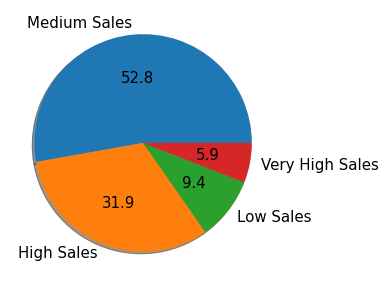

In [23]:
plt.figure(figsize=(8,5))
plt.pie(x=y_train.value_counts(),labels=['Medium Sales','High Sales','Low Sales','Very High Sales'],
        autopct='%0.1f',shadow=True,textprops = {"fontsize":15})
plt.show

#### The Data is imbalanced

In [24]:
from imblearn.over_sampling import SMOTE
balanced = SMOTE()

X_balanced , y_balanced = balanced.fit_resample(X,y)

In [25]:
Optimized_Data=X_balanced.copy()
Optimized_Data['y']=y_balanced

In [26]:
Optimized_Data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,y
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,2
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [27]:
X_train_Opt,X_test_Opt,y_train_Opt,y_test_Opt=train_test_split(X_balanced,y_balanced, test_size=0.2,random_state=123)

print(X_train_Opt.shape)
print(y_train_Opt.shape)

(656, 10)
(656, 1)


In [28]:
Rf_Model_Opt_OS=RandomForestClassifier(criterion='entropy',max_depth=6,random_state=123)

Rf_Model_Opt_OS.fit(X_train_Opt,y_train_Opt)

RandomForestClassifier(criterion='entropy', max_depth=6, random_state=123)

### Evaluating the New Model with Balanced Data

In [29]:
accuracy_score(y_test_Opt,Rf_Model_Opt_OS.predict(X_test_Opt))

0.823170731707317

In [30]:
confusion_matrix(y_test_Opt,Rf_Model_Opt_OS.predict(X_test_Opt))

array([[44,  0,  0,  0],
       [ 6, 31,  1,  0],
       [ 1,  8, 24, 10],
       [ 0,  0,  3, 36]], dtype=int64)

#### Train Data

In [31]:
print(classification_report(y_train_Opt,Rf_Model_Opt_OS.predict(X_train_Opt)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       161
           1       0.97      0.93      0.95       167
           2       0.96      0.86      0.91       162
           3       0.89      0.99      0.94       166

    accuracy                           0.94       656
   macro avg       0.94      0.94      0.94       656
weighted avg       0.94      0.94      0.94       656



#### Test Data

In [32]:
print(classification_report(y_test_Opt,Rf_Model_Opt_OS.predict(X_test_Opt)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        44
           1       0.79      0.82      0.81        38
           2       0.86      0.56      0.68        43
           3       0.78      0.92      0.85        39

    accuracy                           0.82       164
   macro avg       0.82      0.82      0.81       164
weighted avg       0.83      0.82      0.81       164



#### The model has good precision and recall.

## Model Deployment

In [34]:
from pickle import dump,load
dump(Rf_Model_Opt_OS,open('Intel_On_Sales_RF.pkl','wb'))

In [35]:
Loaded_Int=load(open('Intel_On_Sales_RF.pkl','rb'))
pd.DataFrame(Loaded_Int.predict(X_test_Opt.head(3)))

,0
0,2
1,1
2,2


## Finding the attribute that causes high sales

In [36]:
Attribute_Scores=pd.DataFrame()
Attribute_Scores["Columns"]=(X.columns)
Attribute_Scores["Scores"]=(Rf_Model_Opt_OS.feature_importances_)
Attribute_Scores

,Columns,Scores
0,CompPrice,0.091859
1,Income,0.080825
2,Advertising,0.074275
3,Population,0.071343
4,Price,0.205588
5,ShelveLoc,0.262380
6,Age,0.133449
7,Education,0.047369
8,Urban,0.012522
9,US,0.020391


In [37]:
Attribute_Scores[Attribute_Scores["Scores"]==Attribute_Scores["Scores"].max()]

,Columns,Scores
5,ShelveLoc,0.26238


#### The Shelf Location at stores causes the most impact on sales